# Training
Using the Naive Bayes classificator to predict if a word is an answer or not.

In [1]:
#Common imports 
import pandas as pd
import numpy as np

### Pickling

In [2]:
import _pickle as cPickle
from pathlib import Path

def dumpPickle(fileName, content):
    pickleFile = open(fileName, 'wb')
    cPickle.dump(content, pickleFile, -1)
    pickleFile.close()

def loadPickle(fileName):    
    file = open(fileName, 'rb')
    content = cPickle.load(file)
    file.close()
    
    return content
    
def pickleExists(fileName):
    file = Path(fileName)
    
    if file.is_file():
        return True
    
    return False

## Reading the dataframe
Generated from the *Feature Engineering* notebook

In [3]:
wordPickleName = '../input/paraquestion/questionContainmentDf_1.pkl'
df = loadPickle(wordPickleName)

In [4]:
df.head(15)

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,NER,POS,TAG,DEP,shape
0,Architecturally,False,0,0,0.0,1,None,ADV,RB,advmod,Xxxxx
1,school,False,0,0,0.0,1,None,NOUN,NN,nsubj,xxxx
2,Catholic,False,0,0,0.0,1,NORP,None,None,None,Xxxxx
3,character,False,0,0,0.0,1,None,NOUN,NN,dobj,xxxx
4,Atop,False,0,0,1.0,1,None,ADP,IN,prep,Xxxx
5,Main,False,0,0,1.0,1,None,PROPN,NNP,compound,Xxxx
6,Building,False,0,0,1.0,1,None,PROPN,NNP,poss,Xxxxx
7,gold,False,0,0,1.0,1,None,NOUN,NN,compound,xxxx
8,dome,False,0,0,1.0,1,None,NOUN,NN,pobj,xxxx
9,golden,False,0,0,1.0,1,None,ADJ,JJ,amod,xxxx


## One-hot encoding
We need to encode the categorical data - NER, POS, TAG, DEP, shape

In [5]:
df['NER'].value_counts()

ORG            631
DATE           451
PERSON         373
CARDINAL       246
GPE            183
WORK_OF_ART    128
ORDINAL        114
NORP           110
FAC             91
MONEY           48
EVENT           30
LOC             22
PERCENT         17
PRODUCT         17
TIME             6
QUANTITY         4
LANGUAGE         4
LAW              2
Name: NER, dtype: int64

In [6]:
columnsToEncode = ['NER', 'POS', "TAG", 'DEP']

In [7]:
for column in columnsToEncode:
    print(column)
    one_hot = pd.get_dummies(df[column])
    one_hot = one_hot.add_prefix(column + '_')

    df = df.drop(column, axis = 1)
    df = df.join(one_hot)

NER
POS
TAG
DEP


In [8]:
df.head(15)

,text,isAnswer,titleId,paragrapghId,sentenceId,wordCount,shape,NER_CARDINAL,NER_DATE,NER_EVENT,...,DEP_nsubj,DEP_nsubjpass,DEP_nummod,DEP_oprd,DEP_pcomp,DEP_pobj,DEP_poss,DEP_prep,DEP_relcl,DEP_xcomp
0,Architecturally,False,0,0,0.0,1,Xxxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,school,False,0,0,0.0,1,xxxx,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Catholic,False,0,0,0.0,1,Xxxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,character,False,0,0,0.0,1,xxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Atop,False,0,0,1.0,1,Xxxx,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,Main,False,0,0,1.0,1,Xxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Building,False,0,0,1.0,1,Xxxxx,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,gold,False,0,0,1.0,1,xxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,dome,False,0,0,1.0,1,xxxx,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,golden,False,0,0,1.0,1,xxxx,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Remove columns
We need to remove the columns that are not features of the words.

In [9]:
columnsToDrop = ['text', 'titleId', 'paragrapghId', 'sentenceId', 'shape']

In [10]:
df = df.drop(columnsToDrop, axis = 1)

In [11]:
df.head(15)

,isAnswer,wordCount,NER_CARDINAL,NER_DATE,NER_EVENT,NER_FAC,NER_GPE,NER_LANGUAGE,NER_LAW,NER_LOC,...,DEP_nsubj,DEP_nsubjpass,DEP_nummod,DEP_oprd,DEP_pcomp,DEP_pobj,DEP_poss,DEP_prep,DEP_relcl,DEP_xcomp
0,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split to test and train

In [12]:
from sklearn.model_selection import train_test_split

x_data = df.drop(labels=['isAnswer'], axis=1)
y_data = df['isAnswer']

x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.1, 
                                                    random_state=4)

In [13]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

7799
7799
867
867


In [14]:
y_test.head()

43      False
2412    False
3791    False
29      False
8663    False
Name: isAnswer, dtype: bool

## Train model

In [15]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

In [16]:
predictor = gnb.fit(x_train, y_train)
y_pred = predictor.predict(x_test)

### Show Accuracy

In [17]:
correctCount = (y_test == y_pred).sum()

print('Correctly guessed:', '{:.2f}%'.format((correctCount / len(y_test)) * 100))

Correctly guessed: 31.14%


That doesn't really tell us anything. Since our dataset is not balanced - only 02,53%  of the words are answers we need to use a different metric.  

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [19]:
x_train.head(1)

,wordCount,NER_CARDINAL,NER_DATE,NER_EVENT,NER_FAC,NER_GPE,NER_LANGUAGE,NER_LAW,NER_LOC,NER_MONEY,...,DEP_nsubj,DEP_nsubjpass,DEP_nummod,DEP_oprd,DEP_pcomp,DEP_pobj,DEP_poss,DEP_prep,DEP_relcl,DEP_xcomp
1779,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x_train.shape

(7799, 81)

In [21]:
x_train_2 = np.reshape(np.array(x_train),(x_train.shape[0], x_train.shape[1],-1))

In [22]:
x_train_2.shape

(7799, 81, 1)

In [23]:
x_train_2[1].shape

(81, 1)

In [24]:
y_train

1779    False
8565    False
4638    False
3478    False
6661    False
        ...  
456     False
6017    False
709     False
8366    False
1146    False
Name: isAnswer, Length: 7799, dtype: bool

In [25]:
y_train_2 = y_train.astype(int)

In [26]:
y_train_2= np.array(y_train_2)
y_train_2

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
np.count_nonzero(y_train_2 == 0)

7456

In [28]:
y_train_2.shape

(7799,)

In [29]:
x_train_2[1]

array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [30]:
# modelNN = Sequential()

# modelNN.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train_2[1].shape)))
# # modelNN.add(Dropout(0.2))

# modelNN.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
# modelNN.add(Dropout(0.2))

# modelNN.add(Dense(units = 1))

modelNN = Sequential()

modelNN.add(Dense(units = 80, activation = 'tanh', input_shape = (x_train_2[1].shape)))
# modelNN.add(Dropout(0.2))

modelNN.add(Dense(units = 80, activation = 'tanh'))
modelNN.add(Dropout(0.2))

modelNN.add(Dense(units = 1, activation = 'sigmoid'))

modelNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 81, 80)            160       
_________________________________________________________________
dense_1 (Dense)              (None, 81, 80)            6480      
_________________________________________________________________
dropout (Dropout)            (None, 81, 80)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 81, 1)             81        
Total params: 6,721
Trainable params: 6,721
Non-trainable params: 0
_________________________________________________________________


In [31]:
modelNN.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [32]:
modelNN.fit(x_train_2, y_train_2, epochs=10, batch_size = 50)

Epoch 1/10
156/156 [==============================] - 3s 11ms/step - loss: 0.0665 - accuracy: 0.9555
Epoch 2/10
156/156 [==============================] - 2s 12ms/step - loss: 0.0421 - accuracy: 0.9560
Epoch 3/10
156/156 [==============================] - 2s 12ms/step - loss: 0.0422 - accuracy: 0.9560
Epoch 4/10
156/156 [==============================] - 2s 11ms/step - loss: 0.0422 - accuracy: 0.9560
Epoch 5/10
156/156 [==============================] - 2s 11ms/step - loss: 0.0422 - accuracy: 0.9560
Epoch 6/10
156/156 [==============================] - 2s 11ms/step - loss: 0.0422 - accuracy: 0.9560
Epoch 7/10
156/156 [==============================] - 2s 11ms/step - loss: 0.0421 - accuracy: 0.9560
Epoch 8/10
156/156 [==============================] - 3s 16ms/step - loss: 0.0421 - accuracy: 0.9560
Epoch 9/10
156/156 [==============================] - 2s 12ms/step - loss: 0.0421 - accuracy: 0.9560
Epoch 10/10
156/156 [==============================] - 2s 11ms/step - loss: 0.0421 - accura

In [33]:
x_test_2 = np.reshape(np.array(x_test),(x_test.shape[0], x_test.shape[1],-1))

In [34]:
x_test_2.shape

(867, 81, 1)

In [35]:
y_predicted_nn = modelNN.predict(x_test_2)

In [36]:
y_predicted_nn.shape

(867, 81, 1)

In [37]:
y_predicted_nn[0][0][0]

0.02910304

In [38]:
y_predicted_nn_new= []
for i in y_predicted_nn:
    y_predicted_nn_new.append(i[0][0])
    
y_predicted_nn_new = np.array(y_predicted_nn_new)
len(y_predicted_nn_new)

867

In [39]:
scale = 1/y_predicted_nn_new[0]
y_predicted_nn_new *scale

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.93841296,
       0.93841296, 0.93841296, 1.        , 0.8741798 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.1243262 ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.93841296, 0.93841296, 1.        ,
       1.        , 1.        , 0.93841296, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.93841296,
       1.4048054 , 1.        , 0.93841296, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.93841296,
       1.        , 0.93841296, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.1243262 , 1.     

In [40]:
y_predicted_nn_new_2 = np.where(y_predicted_nn_new != y_predicted_nn_new[0], 1, 0).astype(np.bool)
y_predicted_nn_new_2

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False,  True, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True,

In [41]:
y_test_2 = y_test.astype(int)
y_test_2= np.array(y_test_2)
y_test.head(25)

43      False
2412    False
3791    False
29      False
8663    False
1034    False
3502    False
1271    False
2300    False
7933    False
640     False
3788    False
8334    False
1425    False
3787    False
1684    False
1131    False
6281    False
7399     True
1604    False
8443    False
1509    False
7375    False
2185    False
1295     True
Name: isAnswer, dtype: bool

In [42]:
correctCount = (y_test == y_predicted_nn_new_2).sum()

print('Correctly guessed:', '{:.2f}%'.format((correctCount / len(y_test)) * 100))

Correctly guessed: 87.08%


### Confusion matrix

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predicted_nn_new_2)

array([[737,  97],
       [ 15,  18]])

### Prettier confusion matrix

In [44]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_predicted_nn_new_2, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          figsize=(9, 7)):
    matrix = confusion_matrix(y_true, y_predicted_nn_new_2)

    if normalize:
        matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color="white" if matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [45]:
# !pip install matplotlib

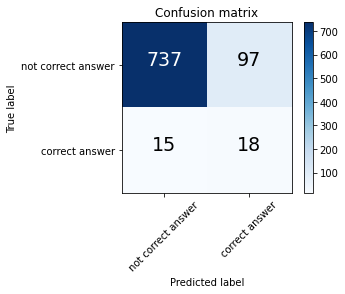

In [46]:
plot_confusion_matrix(y_test, y_predicted_nn_new_2, ['not correct answer', 'correct answer'], figsize=(5, 4))

In [47]:
y_test.value_counts()

False    834
True      33
Name: isAnswer, dtype: int64

In [48]:
y_pred_Series = pd.Series(y_predicted_nn_new_2)

In [49]:
y_pred_Series.value_counts()

False    752
True     115
dtype: int64

Seems like I'm super biased for towards correct answers. But as I found during the *Data exploration*, there are a lot more answer-worthy words that are just not labeled since, I guess the Mechanical Turks had the job to label just 5. So, who knows, maybe I did some black magic and managed to extract all the answer worthy words!

## Saving the model
We'll save our predictor, so we can use it to label new words.

In [50]:
# predictorPickleName = './nb-predictor_1.pkl'
# dumpPickle(predictorPickleName, predictor)

# #Because the one-hot encoding creates a different amount of features (columns in the dataframe), it is important to know which features are used in the Naive Bayes classifier as to not get into an error with different dimensions.
# predictorFeaturesName = './nb-predictor-features_1.pkl'
# dumpPickle(predictorFeaturesName, list(df.columns))

In [51]:
# predictorPickleName = './nb-predictor_4'
# dumpPickle(predictorPickleName, modelNN)
# modelNN.save(predictorPickleName)
# tf.keras.models.save_model(modelNN, predictorPickleName)
# serialize model to JSON
modelNN_json = modelNN.to_json()
with open("./nb-predictor_nn_model_1.json", "w") as json_file:
    json_file.write(modelNN_json)
# serialize weights to HDF5
modelNN.save_weights("model.h5")
print("Saved model to disk")

#Because the one-hot encoding creates a different amount of features (columns in the dataframe), it is important to know which features are used in the Naive Bayes classifier as to not get into an error with different dimensions.
predictorFeaturesName = './nb-predictor-features_1.pkl'
dumpPickle(predictorFeaturesName, list(df.columns))

Saved model to disk
